In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [92]:
df =pd.read_parquet('/content/Train.parquet')

In [93]:
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,sqrt_ShoppingMall,...,group_OHE_2,cabin_num_OHE_1,expenditure_OHE_0,Age_pca_comb_unimp,Spa_pca_comb_unimp,VRDeck_pca_comb_unimp,FoodCourt_final_cluster,ShoppingMall_final_cluster,group_final_cluster,cabin_num_final_cluster
0,1.174601,0.708353,-1.174601,-0.340609,-0.284891,-0.289970,-0.275299,-0.268725,0.0,-0.500229,...,-0.757604,-0.782052,1.053056,-0.685040,-0.636894,-0.614799,0.611251,0.623617,-0.473002,-2.814282
1,-0.851353,-0.334773,0.851353,-0.176182,-0.279260,-0.248282,0.211943,-0.230102,1.0,-0.076271,...,-0.757604,-0.782052,-0.949617,0.162358,1.299729,0.451017,-1.948344,-1.875907,-0.473002,-2.814282
2,-0.851353,2.029646,0.851353,-0.275743,1.952541,-0.289970,5.684319,-0.225713,0.0,-0.500229,...,-0.757604,-0.782052,-0.949617,-1.599937,3.713694,0.473407,0.860375,0.623617,-0.473002,-2.814282
3,-0.851353,0.291103,0.851353,-0.340609,0.517856,0.328676,2.679216,-0.099312,0.0,1.132972,...,-0.757604,-0.782052,-0.949617,-0.363528,2.636226,0.861159,-0.521686,-1.365272,-0.473002,-2.814282
4,-0.851353,-0.891107,0.851353,0.116468,-0.241094,-0.038176,0.226143,-0.266969,1.0,0.541707,...,-0.757604,-0.782052,-0.949617,0.695161,1.314843,-0.015788,-1.948344,-1.894851,-0.473002,0.634110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,-0.851353,0.847436,0.851353,-0.340609,3.981621,-0.289970,1.182877,-0.203769,0.0,-0.500229,...,-0.757604,-0.782052,-0.949617,-0.788106,1.972014,0.567921,0.731017,0.623617,-0.711742,0.765954
8689,1.174601,-0.752024,-1.174601,-0.340609,-0.284891,-0.289970,-0.275299,-0.268725,0.0,-0.500229,...,-0.757604,-0.782052,1.053056,0.554155,-0.636894,-0.614799,0.611251,0.623617,-0.711742,-1.427089
8690,-0.851353,-0.195690,0.851353,-0.340609,-0.284891,2.831607,-0.274411,-0.268725,1.0,3.168415,...,-0.757604,-0.782052,1.053056,0.040026,-0.127048,-0.614799,0.611251,0.553773,-0.711742,-1.427089
8691,-0.851353,0.221561,0.851353,-0.340609,0.371447,-0.289970,0.037992,2.570912,0.0,-0.500229,...,-0.757604,1.278687,-0.949617,-0.307937,1.081121,2.623062,-0.521686,0.623617,-0.711742,-0.485810


In [94]:
df.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'sqrt_ShoppingMall', 'pow_group',
       'log_pow2cabin_num', 'y_J_expenditure', 'expenditure_pca_comb',
       'Last_Name_tfidf_0', 'Last_Name_tfidf_1', 'Last_Name_tfidf_2',
       'Last_Name_tfidf_3', 'Last_Name_tfidf_4', 'HomePlanet_target',
       'HomePlanet_count', 'HomePlanet_count_label', 'HomePlanet_OHE_0',
       'HomePlanet_OHE_1', 'HomePlanet_OHE_2', 'cabin_deck_target',
       'cabin_deck_count', 'cabin_deck_count_label',
       'cabin_deck_cat_cluster_WOE', 'cabin_deck_OHE_1', 'cabin_deck_OHE_2',
       'Destination_target', 'Destination_count', 'Destination_count_label',
       'Destination_OHE_0', 'Destination_OHE_1', 'Destination_OHE_2',
       'cabin_side_target', 'cabin_side_count', 'Age_unimp_cluster_WOE',
       'Age_OHE_0', 'Age_OHE_1', 'Age_OHE_10', 'Age_OHE_3', 'Age_OHE_4',
       'Age_OHE_5', 'Age_OHE_6', 'Age_OHE_7', 'Age_OHE_8', 'Age_OHE_9',
  

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CryoSleep                       8693 non-null   float64
 1   Age                             8693 non-null   float64
 2   VIP                             8693 non-null   float64
 3   RoomService                     8693 non-null   float64
 4   FoodCourt                       8693 non-null   float64
 5   ShoppingMall                    8693 non-null   float64
 6   Spa                             8693 non-null   float64
 7   VRDeck                          8693 non-null   float64
 8   Transported                     8693 non-null   float64
 9   sqrt_ShoppingMall               8693 non-null   float64
 10  pow_group                       8693 non-null   float64
 11  log_pow2cabin_num               8693 non-null   float64
 12  y_J_expenditure                 8693 no

In [96]:
df.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,sqrt_ShoppingMall,...,group_OHE_2,cabin_num_OHE_1,expenditure_OHE_0,Age_pca_comb_unimp,Spa_pca_comb_unimp,VRDeck_pca_comb_unimp,FoodCourt_final_cluster,ShoppingMall_final_cluster,group_final_cluster,cabin_num_final_cluster
count,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8693.000000,8.693000e+03,...,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03
mean,-8.480249e-17,-9.399795e-18,1.211756e-16,-5.619442e-17,3.024282e-17,-8.173734e-19,6.661594e-17,-1.573444e-17,0.503624,3.269494e-17,...,-1.700137e-16,1.201539e-16,-3.167322e-17,-5.312927e-18,-6.579856e-17,-4.025564e-17,-3.416621e-16,-3.821221e-16,-1.503967e-16,6.604377e-16
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,0.500016,1.000058e+00,...,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-8.513528e-01,-2.003775e+00,-1.174601e+00,-3.406092e-01,-2.848911e-01,-2.899696e-01,-2.752987e-01,-2.687248e-01,0.000000,-5.002291e-01,...,-7.576037e-01,-7.820521e-01,-9.496168e-01,-2.487594e+00,-6.368939e-01,-6.147992e-01,-1.961143e+00,-1.894851e+00,-1.611287e+00,-2.814282e+00
25%,-8.513528e-01,-6.824818e-01,-1.174601e+00,-3.406092e-01,-2.848911e-01,-2.899696e-01,-2.752987e-01,-2.687248e-01,0.000000,-5.002291e-01,...,-7.576037e-01,-7.820521e-01,-9.496168e-01,-6.327819e-01,-6.368939e-01,-6.147992e-01,-8.564117e-01,-3.931852e-01,-7.117421e-01,-4.945740e-01
50%,-8.513528e-01,-1.261479e-01,8.513528e-01,-3.406092e-01,-2.848911e-01,-2.899696e-01,-2.752987e-01,-2.687248e-01,1.000000,-5.002291e-01,...,-7.576037e-01,-7.820521e-01,-9.496168e-01,-1.985017e-02,-6.368939e-01,-6.147992e-01,6.112515e-01,6.236170e-01,1.008720e-01,3.027668e-01
75%,1.174601e+00,6.388113e-01,8.513528e-01,-2.576414e-01,-2.342110e-01,-2.399443e-01,-2.167232e-01,-2.222021e-01,1.000000,-3.580661e-02,...,1.319951e+00,1.278687e+00,1.053056e+00,4.858507e-01,5.068293e-01,4.902805e-01,6.112515e-01,6.236170e-01,1.279002e+00,7.659539e-01
max,1.174601e+00,3.490023e+00,8.513528e-01,2.127175e+01,1.836851e+01,3.888315e+01,1.961199e+01,2.091488e+01,1.000000,1.249586e+01,...,1.319951e+00,1.278687e+00,1.053056e+00,3.931745e+00,7.509705e+00,7.871139e+00,2.757843e+00,2.599431e+00,1.409593e+00,1.464638e+00


In [97]:
df.drop_duplicates()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,sqrt_ShoppingMall,...,group_OHE_2,cabin_num_OHE_1,expenditure_OHE_0,Age_pca_comb_unimp,Spa_pca_comb_unimp,VRDeck_pca_comb_unimp,FoodCourt_final_cluster,ShoppingMall_final_cluster,group_final_cluster,cabin_num_final_cluster
0,1.174601,0.708353,-1.174601,-0.340609,-0.284891,-0.289970,-0.275299,-0.268725,0.0,-0.500229,...,-0.757604,-0.782052,1.053056,-0.685040,-0.636894,-0.614799,0.611251,0.623617,-0.473002,-2.814282
1,-0.851353,-0.334773,0.851353,-0.176182,-0.279260,-0.248282,0.211943,-0.230102,1.0,-0.076271,...,-0.757604,-0.782052,-0.949617,0.162358,1.299729,0.451017,-1.948344,-1.875907,-0.473002,-2.814282
2,-0.851353,2.029646,0.851353,-0.275743,1.952541,-0.289970,5.684319,-0.225713,0.0,-0.500229,...,-0.757604,-0.782052,-0.949617,-1.599937,3.713694,0.473407,0.860375,0.623617,-0.473002,-2.814282
3,-0.851353,0.291103,0.851353,-0.340609,0.517856,0.328676,2.679216,-0.099312,0.0,1.132972,...,-0.757604,-0.782052,-0.949617,-0.363528,2.636226,0.861159,-0.521686,-1.365272,-0.473002,-2.814282
4,-0.851353,-0.891107,0.851353,0.116468,-0.241094,-0.038176,0.226143,-0.266969,1.0,0.541707,...,-0.757604,-0.782052,-0.949617,0.695161,1.314843,-0.015788,-1.948344,-1.894851,-0.473002,0.634110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,-0.851353,0.847436,0.851353,-0.340609,3.981621,-0.289970,1.182877,-0.203769,0.0,-0.500229,...,-0.757604,-0.782052,-0.949617,-0.788106,1.972014,0.567921,0.731017,0.623617,-0.711742,0.765954
8689,1.174601,-0.752024,-1.174601,-0.340609,-0.284891,-0.289970,-0.275299,-0.268725,0.0,-0.500229,...,-0.757604,-0.782052,1.053056,0.554155,-0.636894,-0.614799,0.611251,0.623617,-0.711742,-1.427089
8690,-0.851353,-0.195690,0.851353,-0.340609,-0.284891,2.831607,-0.274411,-0.268725,1.0,3.168415,...,-0.757604,-0.782052,1.053056,0.040026,-0.127048,-0.614799,0.611251,0.553773,-0.711742,-1.427089
8691,-0.851353,0.221561,0.851353,-0.340609,0.371447,-0.289970,0.037992,2.570912,0.0,-0.500229,...,-0.757604,1.278687,-0.949617,-0.307937,1.081121,2.623062,-0.521686,0.623617,-0.711742,-0.485810


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CryoSleep                       8693 non-null   float64
 1   Age                             8693 non-null   float64
 2   VIP                             8693 non-null   float64
 3   RoomService                     8693 non-null   float64
 4   FoodCourt                       8693 non-null   float64
 5   ShoppingMall                    8693 non-null   float64
 6   Spa                             8693 non-null   float64
 7   VRDeck                          8693 non-null   float64
 8   Transported                     8693 non-null   float64
 9   sqrt_ShoppingMall               8693 non-null   float64
 10  pow_group                       8693 non-null   float64
 11  log_pow2cabin_num               8693 non-null   float64
 12  y_J_expenditure                 8693 no

In [99]:
df['Spa']

,Spa
0,-0.275299
1,0.211943
2,5.684319
3,2.679216
4,0.226143
...,...
8688,1.182877
8689,-0.275299
8690,-0.274411
8691,0.037992


In [100]:
df['nw_spa'] = df[['Spa', 'Spa_OHE_0', 'Spa_OHE_2', 'Spa_OHE_4','Spa_pca_comb_unimp']].sum(axis=1, skipna=True)
df['nw_age'] = df[['Age','Age_OHE_0', 'Age_OHE_1', 'Age_OHE_10', 'Age_OHE_3', 'Age_OHE_4',
       'Age_OHE_5', 'Age_OHE_6', 'Age_OHE_7', 'Age_OHE_8', 'Age_OHE_9','Age_pca_comb_unimp']].sum(axis=1, skipna=True)
df['nw_HomePlanet'] = df[['HomePlanet_target',
       'HomePlanet_count', 'HomePlanet_count_label', 'HomePlanet_OHE_0',
       'HomePlanet_OHE_1', 'HomePlanet_OHE_2']].sum(axis=1, skipna=True)
df['nw_Last_Name'] = df[['Last_Name_tfidf_0', 'Last_Name_tfidf_1', 'Last_Name_tfidf_2',
       'Last_Name_tfidf_3', 'Last_Name_tfidf_4']].sum(axis=1, skipna=True)
df['nw_cabin_deck'] = df[['cabin_deck_target',
       'cabin_deck_count', 'cabin_deck_count_label',
       'cabin_deck_cat_cluster_WOE', 'cabin_deck_OHE_1', 'cabin_deck_OHE_2']].sum(axis=1, skipna=True)
df['nw_Destination'] = df[['Destination_target', 'Destination_count', 'Destination_count_label',
       'Destination_OHE_0', 'Destination_OHE_1', 'Destination_OHE_2']].sum(axis=1, skipna=True)
df['nw_group_OHE_0'] = df[['group_OHE_0', 'group_OHE_2']].sum(axis=1, skipna=True)
df['nw_RoomService'] = df[['RoomService_OHE_1', 'RoomService_OHE_2']].sum(axis=1, skipna=True)


In [101]:
df=df.drop(['Spa', 'Spa_OHE_0', 'Spa_OHE_2', 'Spa_OHE_4'], axis=1)
df=df.drop(['Age','Age_OHE_0', 'Age_OHE_1', 'Age_OHE_10', 'Age_OHE_3', 'Age_OHE_4',
       'Age_OHE_5', 'Age_OHE_6', 'Age_OHE_7', 'Age_OHE_8', 'Age_OHE_9'], axis=1)
df=df.drop(['HomePlanet_target',
       'HomePlanet_count', 'HomePlanet_count_label', 'HomePlanet_OHE_0',
       'HomePlanet_OHE_1', 'HomePlanet_OHE_2'], axis=1)
df=df.drop(['Last_Name_tfidf_0', 'Last_Name_tfidf_1', 'Last_Name_tfidf_2',
       'Last_Name_tfidf_3', 'Last_Name_tfidf_4'], axis=1)
df=df.drop(['cabin_deck_target',
       'cabin_deck_count', 'cabin_deck_count_label',
       'cabin_deck_cat_cluster_WOE', 'cabin_deck_OHE_1', 'cabin_deck_OHE_2'], axis=1)
df=df.drop(['Destination_target', 'Destination_count', 'Destination_count_label',
       'Destination_OHE_0', 'Destination_OHE_1', 'Destination_OHE_2'], axis=1)
df=df.drop(['group_OHE_0', 'group_OHE_2'], axis=1)
df=df.drop([ 'RoomService_OHE_0', 'RoomService_OHE_1', 'RoomService_OHE_2'], axis=1)
df=df.drop(['FoodCourt_OHE_0','cabin_side_target', 'cabin_side_count', 'Age_unimp_cluster_WOE',
       'ShoppingMall_unimp_cluster_WOE', 'Spa_unimp_cluster_WOE', 'VRDeck_OHE_1', 'VRDeck_OHE_2'], axis=1)

In [102]:
df.columns

Index(['CryoSleep', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'VRDeck', 'Transported', 'sqrt_ShoppingMall', 'pow_group',
       'log_pow2cabin_num', 'y_J_expenditure', 'expenditure_pca_comb',
       'VRDeck_unimp_cluster_WOE', 'cabin_num_OHE_1', 'expenditure_OHE_0',
       'Age_pca_comb_unimp', 'Spa_pca_comb_unimp', 'VRDeck_pca_comb_unimp',
       'FoodCourt_final_cluster', 'ShoppingMall_final_cluster',
       'group_final_cluster', 'cabin_num_final_cluster', 'nw_spa', 'nw_age',
       'nw_HomePlanet', 'nw_Last_Name', 'nw_cabin_deck', 'nw_Destination',
       'nw_group_OHE_0', 'nw_RoomService'],
      dtype='object')

In [103]:
df.isnull().sum()

,0
CryoSleep,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
VRDeck,0
Transported,0
sqrt_ShoppingMall,0
pow_group,0
log_pow2cabin_num,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CryoSleep                   8693 non-null   float64
 1   VIP                         8693 non-null   float64
 2   RoomService                 8693 non-null   float64
 3   FoodCourt                   8693 non-null   float64
 4   ShoppingMall                8693 non-null   float64
 5   VRDeck                      8693 non-null   float64
 6   Transported                 8693 non-null   float64
 7   sqrt_ShoppingMall           8693 non-null   float64
 8   pow_group                   8693 non-null   float64
 9   log_pow2cabin_num           8693 non-null   float64
 10  y_J_expenditure             8693 non-null   float64
 11  expenditure_pca_comb        8693 non-null   float64
 12  VRDeck_unimp_cluster_WOE    8693 non-null   float64
 13  cabin_num_OHE_1             8693 non-n

In [105]:
X=df[['CryoSleep', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'VRDeck', 'sqrt_ShoppingMall', 'pow_group',
       'log_pow2cabin_num', 'y_J_expenditure', 'expenditure_pca_comb',

       'VRDeck_unimp_cluster_WOE',
       'cabin_num_OHE_1', 'expenditure_OHE_0', 'Age_pca_comb_unimp',
       'Spa_pca_comb_unimp', 'VRDeck_pca_comb_unimp',
       'FoodCourt_final_cluster', 'ShoppingMall_final_cluster',
       'group_final_cluster', 'cabin_num_final_cluster', 'nw_spa', 'nw_age',
       'nw_HomePlanet', 'nw_Last_Name', 'nw_cabin_deck', 'nw_Destination',
       'nw_group_OHE_0', 'nw_RoomService']]
y=df['Transported']

In [106]:
X.shape

(8693, 29)

In [107]:
y.shape

(8693,)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


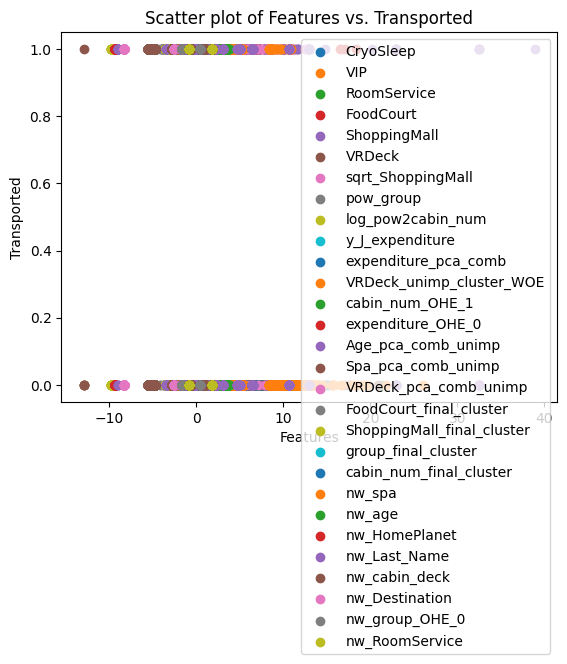

In [108]:
plt.figure()  # Create a figure and axes
for column in X.columns:
    plt.scatter(X[column], y, label=column)  # Plot each column against y, with label

plt.xlabel('Features')
plt.ylabel('Transported')
plt.title('Scatter plot of Features vs. Transported')
plt.legend()  # Show legend to distinguish features
plt.show()

In [109]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=42)

In [110]:
model=LinearRegression()
model.fit(train_x,train_y)
y_pred = model.predict(test_x)

In [111]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)



In [112]:
print(mse)

0.15643451013511636


In [113]:
print(r2)

0.37417915049329387


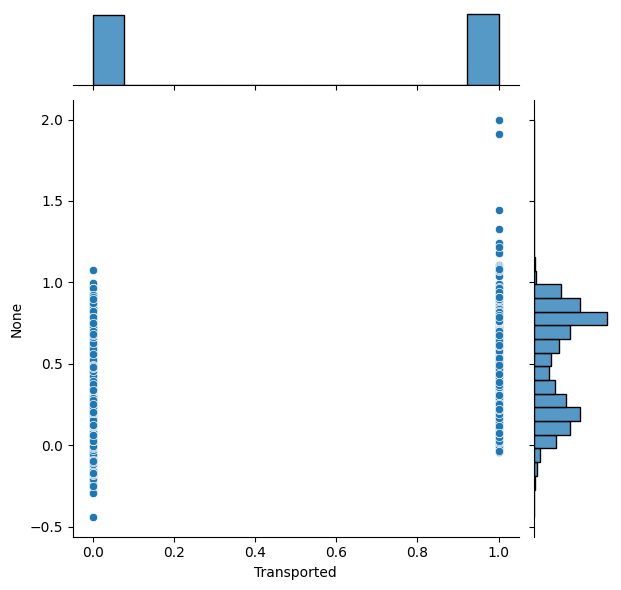

In [114]:
sns.jointplot(x=test_y,y=y_pred )

In [115]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [116]:
random_forest = RandomForestClassifier(random_state=42)# Initialize models
random_forest.fit(train_x, train_y)# Train models
rf_pred = random_forest.predict(test_x)# Make predictions
rf_mse = mean_squared_error(test_y, rf_pred)# Evaluate models
accuracy = accuracy_score(test_y, rf_pred)
print("Random Forest MSE:", rf_mse)
print("Accuracy:", accuracy)

Random Forest MSE: 0.2147239263803681
Accuracy: 0.7852760736196319
